# 27-100 Computational MSE Lab: Diffusion!
Welcome to the computational lab! In these exercises, we'll explore diffusion at both the atomistic and continuum lengthscales. As you've seen by now, one of the hallmarks of "MSE thinking" is connecting across lengthscales – for example, understanding dislocation motion and how it leads to plastic deformation. We've talked some in lecture about atomistic mechanisms of diffusion (e.g. via vacancies) as well as how we describe it in a continuum setting (Fick's Laws). Here we'll explore how those ideas are connected to each other through a series of **computational experiments** that you'll be guided through. You will not need to be able to write any code yourself (though if you're curious, you'll be able to see the code that's being run).

You'll also be able to see how such **computational experiments** can be very analogous to lab-based ones...keep this in mind as you work, and think about how computation can be similar to/different from experiments, and how the two approaches might complement each other!

## What is this thing I'm reading?
This is a Jupyter notebook, an environment for **literate programming**, where formatted text (like this) can be interspersed with interactively runnable code cells (like the ones immediately below this). Jupyter comes from Ju (Julia) + Py (Python) + R, and as the name suggests, it can run code in all three of these languages. This particular notebook is running Julia.

To run a cell, simply select it by clicking on it and use <kbd>Shift</kbd> + <kbd>Enter</kbd> to execute the code. You'll need to execute each cell for things to work properly – many of them will create an interactive thing for you to work with, for example to paste data into for processing.

Go ahead and run these first two cells below now – they will set up the computational environment so that all the needed packages will be loaded. When they've executed successfully, a number should appear to the left.

In [1]:
import Pkg; Pkg.activate(".")

  Activating project at `/Volumes/Data/git_repos/27100_diffusion_computational_lab`


In [112]:
using Interact
using DataFrames
using CSV
using Plots
using Statistics


# Atomistic-Scale Diffusion: Molecular Dynamics
We'll start by investigating diffusion at the atomistic scale, in a way that only simulations are capable of (at least right now)...by tracking positions of thousands of individual atoms at once! This uses a technique called **molecular dynamics**, where we choose a model interatomic potential (in this case, Lennard-Jones, which you explored on homework 5) and just run Newton's Laws between all pairs of particles to generate atomic trajectories.

We'll use a nice online two-dimensional MD engine that you can access [here](https://physics.weber.edu/schroeder/md/). Start by opening it up and playing around a bit to familiarize yourself with the interface (if you explore any of the Presets, just refresh the page at the end to get to the default setup, which is what we'll be using).

In an atomistic simulation like this, we can extract diffusion coefficients by tracking the **mean squared displacement (MSD)** of atoms across the system trajectory, and the diffusion coefficient is related to the slope of MSD vs. time: 

$$MSD = 2nDt$$

(where $n$ is the number of dimensions)

But things down at the atomistic level are _noisy_, so to get good estimates, we need LOTS of data! We'll explore a few different ways to collect a LOT of data here...

## Approach 1: tracking individual atoms
One way to collect a LOT of data is to collect very locations of a single particle at many, many time points. Let's try that first.

[MORE DIRECTIONS HERE...]

.85 (2125/2500), T=.55 roughly

select new atom each time, write data every 10 steps, paste raw data into boxes below, etc. (10ish minutes per collection but you can probably run in a couple browser windows at once without much issue, turn down steps per frame if you want to make it faster)

Paste in your first trajectory below:

In [299]:
data1 = Widgets.textarea("paste trajectory data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste trajectory data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001ab4d5f90, Task (runnable) @0x00000001ab4d5f90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 7029653520, 7119806208)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"4240306119568929875\",\"id\":\"74\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"4240306119568929875\",\"id\":\"74\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbo

Second trajectory goes here:

In [300]:
data2 = Widgets.textarea("paste trajectory data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste trajectory data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001ab71ae00, Task (runnable) @0x00000001ab71ae00), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (6, 0, 7010825792)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"3968705946854792669\",\"id\":\"75\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"3968705946854792669\",\"id\":\"75\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbol, Any}(:

And the third one:

In [301]:
data3 = Widgets.textarea("paste trajectory data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste trajectory data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001aba5d900, Task (runnable) @0x00000001aba5d900), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 7113492992, 4801178928)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"14545974396135267865\",\"id\":\"76\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"14545974396135267865\",\"id\":\"76\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Sym

You get the idea...

In [303]:
data4 = Widgets.textarea("paste trajectory data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste trajectory data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001abd70a90, Task (runnable) @0x00000001abd70a90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 4872459504, 4863445536)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"11301822223989417677\",\"id\":\"77\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"11301822223989417677\",\"id\":\"77\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Sym

In [304]:
data5 = Widgets.textarea("paste trajectory data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste trajectory data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001abd731f0, Task (runnable) @0x00000001abd731f0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 4393001472, 7036591952)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"14014978754336589943\",\"id\":\"78\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"14014978754336589943\",\"id\":\"78\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Sym

Run the cell below to define the function that will process the text you pasted in into a format we can work with.

In [ ]:
function process_raw_data(datawidget)
    # read in data and put it in a DataFrame
    st = datawidget.output;
    df = CSV.read(IOBuffer(st.val), DataFrame);
    # process: calculate squared displacement and offset time axis to start at 0
    df[:, :dsq] .= (df[:, :x].-df[1, :x]).^2 .+ (df[:, :y].-df[1,:y]).^2; 
    df[:, :t] .= df[:, :t] .- df[1,:t];
    return df
end

Now we can read in each of the datasets using that function...

In [306]:
dfs = process_raw_data.([data1, data2, data3, data4, data5]);

...and visualize the squared displacement of each atom over time in a plot:

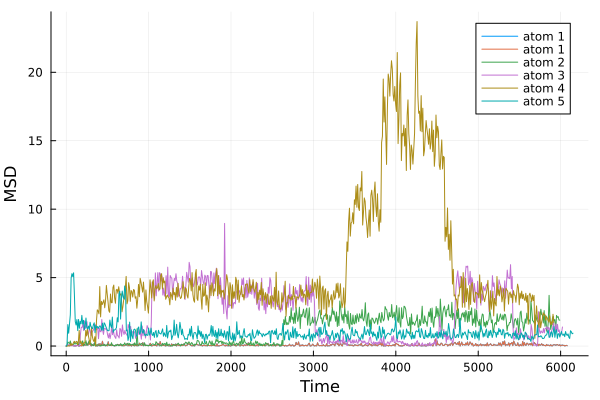

In [307]:
plot(dfs[1][:, :t], dfs[1][:, :dsq], label="atom 1")

for (i, df) in enumerate(dfs)
    plot!(df[:, :t], df[:, :dsq], label="atom "*string(i))
end
    
xlabel!("Time")
ylabel!("MSD")

To estimate $D$, we'll take the average over all three trajectories and fit a line to that data...

In [ ]:
# TODO: will probably need to interpolate to do the averaging

MORE HERE...compare with other people and see how varied the answers are...

In [309]:
total_datapts = sum(size.(dfs, Ref(1)))

3018

## Approach 2: Few snapshots of ALL the particles
[MORE DIRECTIONS HERE]

In [197]:
n_atoms = 2125;

In [167]:
t1 = Widgets.spinbox("enter timestamp for first snapshot")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{Any, Any}(:type => "number", Symbol("data-bind") => "numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"), :placeholder => "enter timestamp for first snapshot", :className => "input ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "value" => (Observable{Union{Nothing, Float64}}(nothing), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a0978e80, Task (runnable) @0x00000001a0978e80), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 6962898800, 4587480416)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4291214710647940719\",\"id\":\"29\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"4291214710647940719\",\"id\":\"28\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"4291214710647940719\",\"id\":\"29\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"4291214710647940719\",\"id\"

In [184]:
snapshot1 = Widgets.textarea("paste snapshot data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste snapshot data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001b4c2d900, Task (runnable) @0x00000001b4c2d900), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (4789765600, 7315971760, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"10445036993716100312\",\"id\":\"46\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"10445036993716100312\",\"id\":\"46\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbo

In [289]:
t2 = Widgets.spinbox("enter timestamp for second snapshot")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{Any, Any}(:type => "number", Symbol("data-bind") => "numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"), :placeholder => "enter timestamp for second snapshot", :className => "input ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "value" => (Observable{Union{Nothing, Float64}}(nothing), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9ba9270, Task (runnable) @0x00000001a9ba9270), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 4294973440, 1)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"13879691570840592151\",\"id\":\"66\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"13879691570840592151\",\"id\":\"65\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"13879691570840592151\",\"id\":\"66\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"13879691570840592151\",\"id\":\"6

In [290]:
snapshot2 = Widgets.textarea("paste snapshot data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste snapshot data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9bab880, Task (runnable) @0x00000001a9bab880), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 7066297216, 7018905792)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"596283502622809701\",\"id\":\"67\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"596283502622809701\",\"id\":\"67\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbol, A

In [291]:
t3 = Widgets.spinbox("enter timestamp for third snapshot")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{Any, Any}(:type => "number", Symbol("data-bind") => "numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"), :placeholder => "enter timestamp for third snapshot", :className => "input ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "value" => (Observable{Union{Nothing, Float64}}(nothing), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9be6a10, Task (runnable) @0x00000001a9be6a10), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 4393000960, 4294967307)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4616498300151347002\",\"id\":\"69\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"4616498300151347002\",\"id\":\"68\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"4616498300151347002\",\"id\":\"69\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"4616498300151347002\",\"id\"

In [292]:
snapshot3 = Widgets.textarea("paste snapshot data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste snapshot data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9d41cf0, Task (runnable) @0x00000001a9d41cf0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 6961900080, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"9605974561992269896\",\"id\":\"70\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"9605974561992269896\",\"id\":\"70\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbol, Any}(:cl

In [293]:
t4 = Widgets.spinbox("enter timestamp for fourth snapshot")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{Any, Any}(:type => "number", Symbol("data-bind") => "numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"), :placeholder => "enter timestamp for fourth snapshot", :className => "input ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "value" => (Observable{Union{Nothing, Float64}}(nothing), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9ed5120, Task (runnable) @0x00000001a9ed5120), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 4789736976, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"6272479016984337966\",\"id\":\"72\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"6272479016984337966\",\"id\":\"71\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"6272479016984337966\",\"id\":\"72\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"6272479016984337966\",\"id\":\"71\",

In [294]:
snapshot4 = Widgets.textarea("paste snapshot data here")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :textarea), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(:placeholder => "paste snapshot data here", "data-bind" => "value: value, valueUpdate: 'input'"), :className => "textarea ", :style => Dict{Any, Any}())), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable(""), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rkurchin/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/rkurchin/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"value\"]()) ? (this.valueFromJulia[\"value\"]=true, this.model[\"value\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001a9fd4550, Task (runnable) @0x00000001a9fd4550), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 4781506576, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"14758063252869668875\",\"id\":\"73\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"14758063252869668875\",\"id\":\"73\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/3268aa453acf20217634de8b759710ecfa84b18e-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/fe2a192c367289f39b8280b58861b0e90803c10f-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbol, Any}(:

Now process some things... [TODO: ADD MORE HERE]

In [295]:
snapshots = [snapshot1, snapshot2, snapshot3, snapshot4]
tvals = [t.output.val for t in [t1, t2, t3, t4]] .- t1.output.val

4-element Vector{Float64}:
    0.0
  704.16
  907.2
 1501.2

In [182]:
function process_snapshot(textwidget)
    st = textwidget.output;
    sdf = CSV.read(IOBuffer(st.val), DataFrame, header=7);
    rename!(sdf, [:x, :y, :vx, :vy]);
    select!(sdf, [:x, :y]);
    return sdf
end    

process_snapshot (generic function with 1 method)

In [296]:
sdfs = process_snapshot.(snapshots)
dsq = zeros(Float64, length(snapshots), n_atoms);

for (i, sdf) in enumerate(sdfs)
    d = sdf .- sdfs[1]
    dsq[i, :] .= d.x .^2 + d.y .^2
end

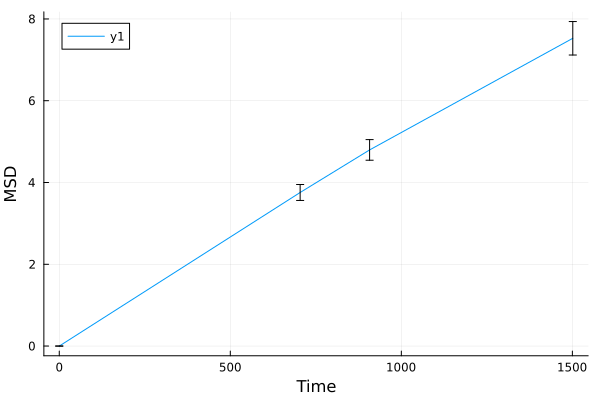

In [310]:
plot(tvals, mean(dsq, dims=2); yerror=std(dsq, dims=2)./sqrt(n_atoms))
xlabel!("Time")
ylabel!("MSD")

In [298]:
total_datapts = n_atoms * length(snapshots)

8500

In [ ]:
# plotting code for individual atoms and for average

## maybe explore LJ phase diagram?
TBD, also here's a picture!

<img src="https://www.researchgate.net/publication/49750821/figure/fig1/AS:667216336936969@1536088179352/Phase-diagram-of-2D-Lennard-Jones-solid-as-given-in-9-The-first-order-boundaries-are.png" width="300">

# Continuum-Scale Diffusion: Fick's Laws

## some tests that Interact.jl is working properly...

In [ ]:
 s = slider(1:100)

In [ ]:
Interact.@on print(string("The value is ", &s));